In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

In [31]:
df = pd.read_csv('test.csv')
df = df.drop(columns=["Age Category", "Sex", "Qualifications", "Habitat", "Media category", "Well-being category", "anxiety category"])
print(df.head())


   Age  Media use(hrs/day)  Well-being score  anxiety score
0   30                  10                56              9
1   27                   8                48             17
2   25                  11                45             18
3   25                  12                50             12
4   22                   8                41             10


In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [33]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


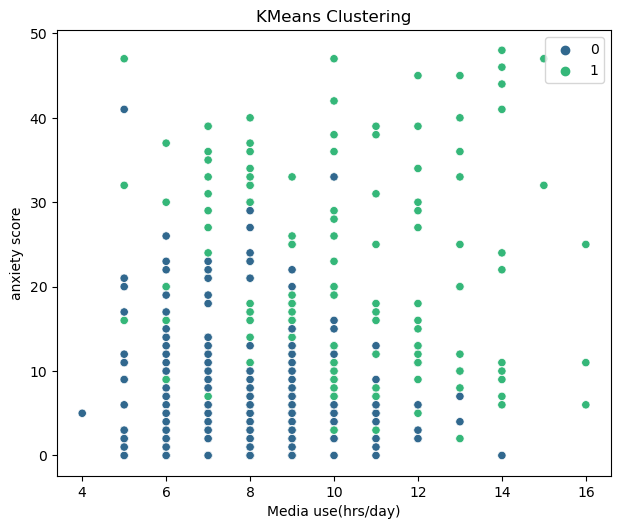

In [34]:
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Media use(hrs/day)', y='anxiety score', data=df, hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering')

plt.tight_layout()
plt.show()

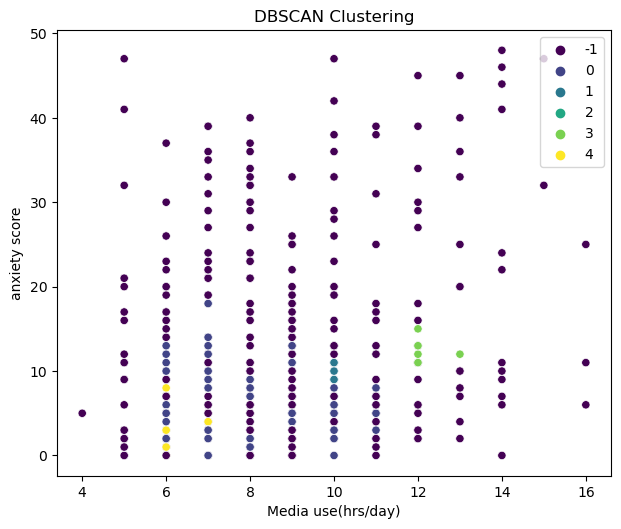

In [35]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualization of results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 2)
sns.scatterplot(x='Media use(hrs/day)', y='anxiety score', data=df, hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

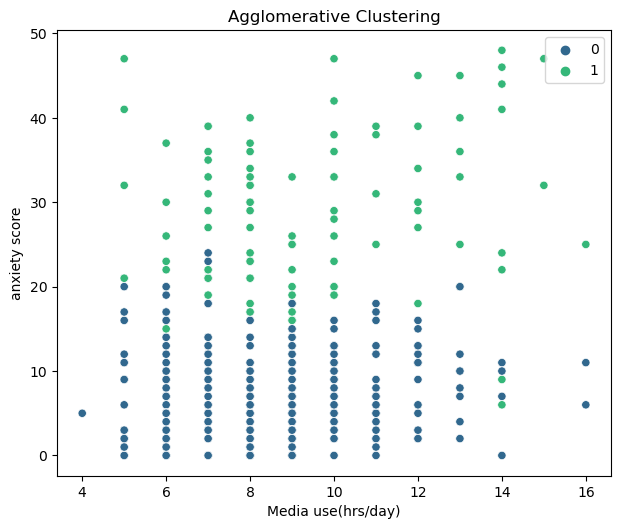

In [36]:
# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_cluster.fit_predict(scaled_data)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 3)
sns.scatterplot(x='Media use(hrs/day)', y='anxiety score', data=df, hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

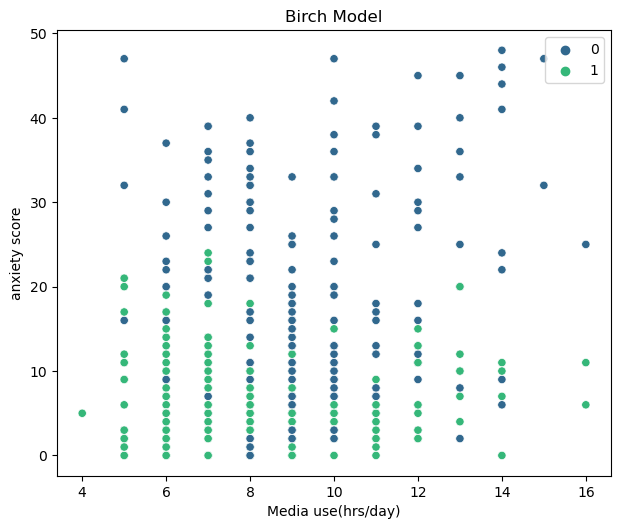

In [37]:
# Birch Models
birch = Birch(n_clusters=2)
birch_labels = birch.fit_predict(scaled_data)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 4)
sns.scatterplot(x='Media use(hrs/day)', y='anxiety score', data=df, hue=birch_labels, palette='viridis')
plt.title('Birch Model')

plt.tight_layout()
plt.show()

In [38]:
# KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(df, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(df, kmeans_labels)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_silhouette = silhouette_score(df, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(df, dbscan_labels)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(scaled_data)
agg_silhouette = silhouette_score(df, agg_labels)
agg_davies_bouldin = davies_bouldin_score(df, agg_labels)

# Birch Models
birch = Birch(n_clusters=2)
birch_labels = birch.fit_predict(scaled_data)
birch_silhouette = silhouette_score(df, birch_labels)
birch_davies_bouldin = davies_bouldin_score(df, birch_labels)

# Displaying scores
print("Clustering Methods    :", "kmeans_labels,", "agglomerative_labels,", "dbscan_labels,", "birch_labels")
print("Silhouette Scores     :", [kmeans_silhouette, agg_silhouette, dbscan_silhouette, birch_silhouette])
print("Davies Bouldin Indices:", [kmeans_davies_bouldin, agg_davies_bouldin, dbscan_davies_bouldin, birch_davies_bouldin])

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering Methods    : kmeans_labels, agglomerative_labels, dbscan_labels, birch_labels
Silhouette Scores     : [0.3017338622040249, 0.26289936787887336, -0.26666652271082214, 0.19796868419545094]
Davies Bouldin Indices: [1.1316203079142566, 1.2372006871637382, 1.8652180335414137, 1.7729833413686185]
